**Importing** **the** **libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


**Reading** **the** **dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

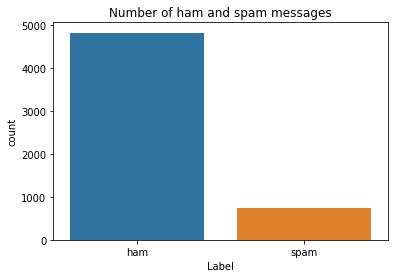

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')


In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


**Process the data**

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ..., 135, 453, 391],
       [  0,   0,   0, ...,  65, 782, 842],
       [  0,   0,   0, ...,  82,   2, 176],
       ...,
       [  0,   0,   0, ...,  51, 960, 256],
       [  0,   0,   0, ...,  49,  12, 298],
       [  0,   0,   0, ..., 753, 853,  59]], dtype=int32)

In [ ]:
tok.index_word

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'is',
 9: 'in',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'call',
 17: 'have',
 18: 'on',
 19: '2',
 20: 'that',
 21: 'are',
 22: 'now',
 23: 'so',
 24: 'not',
 25: 'or',
 26: 'but',
 27: 'do',
 28: 'at',
 29: 'get',
 30: 'can',
 31: 'ur',
 32: 'if',
 33: 'will',
 34: 'be',
 35: "i'm",
 36: 'no',
 37: 'just',
 38: 'with',
 39: 'we',
 40: 'this',
 41: '4',
 42: 'gt',
 43: 'up',
 44: 'lt',
 45: 'how',
 46: 'when',
 47: 'free',
 48: 'ok',
 49: 'go',
 50: 'all',
 51: 'from',
 52: 'out',
 53: 'good',
 54: 'got',
 55: 'know',
 56: 'was',
 57: 'what',
 58: 'then',
 59: 'like',
 60: 'its',
 61: 'day',
 62: 'am',
 63: 'time',
 64: 'come',
 65: 'only',
 66: 'love',
 67: 'there',
 68: 'text',
 69: 'he',
 70: 'send',
 71: 'want',
 72: 'txt',
 73: 'going',
 74: 'one',
 75: 'need',
 76: 'as',
 77: 'home',
 78: 'by',
 79: "i'll",
 80: 'about',
 81: 'sorry',
 82: 'stop',
 83: 'see',
 84: 'r',
 85:

**Creating model and Adding the layers**

In [ ]:
TOT_SIZE = len(tok.word_index)+1
lstm_model = Sequential()
lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_len))
lstm_model.add(LSTM(100))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(20, activation="relu"))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation = "sigmoid"))

**Compile the model**

In [ ]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 32)           264032    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 319,273
Trainable params: 319,273
Non-tr

**Fit the model**

In [ ]:
lstm_model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,
          workers=10,
           callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 12s 404ms/step - loss: 0.1012 - accuracy: 0.9799 - val_loss: 0.0636 - val_accuracy: 0.9831
Epoch 2/10
30/30 [==============================] - 12s 392ms/step - loss: 0.0488 - accuracy: 0.9876 - val_loss: 0.0597 - val_accuracy: 0.9852


**Save the model**

In [ ]:
lstm_model.save('sms.h5')

**Test the model**

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
acc = lstm_model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 40ms/step - loss: 0.0646 - accuracy: 0.9785


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss: 0.065
  Accuracy: 0.978
